<a href="https://colab.research.google.com/github/Sushmithaa-Pandian/DOA_estimation/blob/main/LowSNR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from tensorflow.python.keras.utils.vis_utils import plot_model
import pydot

from scipy.stats import norm
from scipy import stats

from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('/content/gdrive/MyDrive/datasethighnoise.xlsx')

In [ ]:
df.head()

,angle1,angle2,abs1,abs2,abs3,abs4,abs5,abs6,abs7,abs8,...,ang1,ang2,ang3,ang4,ang5,ang6,ang7,ang8,ang9,ang10
0,0,0,0.1564,0.6342,0.5508,0.0076,0.5195,0.7473,0.2654,0.2714,...,0.4894,0.0000,3.0442,1.5335,0.0936,0.0000,-0.0490,-0.6275,-2.3550,-2.5066
1,0,5,0.4809,0.3541,0.5381,0.5841,0.1122,0.6103,0.1574,0.2745,...,-0.1449,-2.5110,0.5573,0.0000,-0.1944,3.0967,2.4546,2.8438,0.0000,-2.4029
2,0,10,0.1661,0.8271,0.3572,0.3005,0.2653,0.2093,0.4576,0.1988,...,-0.1209,0.0000,-2.1228,0.0199,0.2357,-1.2714,-2.9560,2.9996,0.0000,0.1843
3,0,15,0.2577,0.1026,0.4963,0.6653,0.4839,0.5361,0.1878,0.6045,...,0.0385,0.8866,-2.5782,0.0000,3.0104,-2.4260,1.3516,0.0000,0.3969,-2.2179
4,0,20,0.3584,0.7470,0.1264,0.5064,0.2028,0.7410,0.4116,0.2389,...,2.9084,0.0000,2.7215,2.9589,2.8113,0.0000,-0.2396,3.1158,-2.9997,0.0588


In [ ]:
df.dtypes

angle1      int64
angle2      int64
abs1      float64
abs2      float64
abs3      float64
abs4      float64
abs5      float64
abs6      float64
abs7      float64
abs8      float64
abs9      float64
abs10     float64
ang1      float64
ang2      float64
ang3      float64
ang4      float64
ang5      float64
ang6      float64
ang7      float64
ang8      float64
ang9      float64
ang10     float64
dtype: object

In [ ]:
train, test = train_test_split(df, test_size=0.2, random_state = 1)



In [ ]:
j=df.iloc(0)

In [ ]:
train_stats = train.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
angle1,288.0,45.017361,27.634682,0.0000,20.000000,45.00000,70.000000,90.0000
angle2,288.0,43.576389,27.025367,0.0000,20.000000,45.00000,65.000000,90.0000
abs1,288.0,0.385903,0.218222,0.0135,0.205475,0.36205,0.540950,0.9282
abs2,288.0,0.396914,0.228477,0.0110,0.199875,0.35785,0.576925,0.9534
abs3,288.0,0.401405,0.219110,0.0340,0.232650,0.36435,0.557025,0.9451
abs4,288.0,0.383097,0.210607,0.0049,0.210075,0.36050,0.529850,0.8829
abs5,288.0,0.384296,0.215899,0.0037,0.206150,0.34705,0.546250,0.9279
abs6,288.0,0.394433,0.213473,0.0229,0.218150,0.37360,0.536725,0.9217
abs7,288.0,0.369031,0.213024,0.0160,0.203000,0.33340,0.502300,0.9228
abs8,288.0,0.390140,0.214153,0.0325,0.205525,0.36640,0.549800,0.9026


In [ ]:
train_X = train
test_X = test

In [ ]:
def get_labels(df):
    angle1 = df.pop('angle1')
    angle1 = np.array(angle1)
    angle2 = df.pop('angle2')
    angle2 = np.array(angle2)
    return (angle1,angle2)

In [ ]:
train_y = get_labels(train)
test_y = get_labels(test)

In [ ]:
inputs = tf.keras.layers.Input(shape=(20,))

#Add dense layers to the input layer. These layers are commom to both predicted variables.
x = Dense(units=512, activation='relu')(inputs)
x = Dense(units=256, activation='relu')(x)
x = Dense(units=128, activation='relu')(x)
x = Dense(units=64, activation='relu')(x)
x = Dense(units=32, activation='relu')(x)
x = Dense(units=16, activation='relu')(x)
x = Dense(units=8, activation='relu')(x)
x=Dense(units=4, activation='relu')(x)


y_t_layer = Dense(units = 1, name='y_t_layer')(x)
y_q_layer = Dense(units=1, name='y_q_layer')(x)
model = Model(inputs=inputs, outputs=[y_q_layer, y_t_layer])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss = {'y_t_layer' : 'mse',
                      'y_q_layer' : 'mse'
                     },
              metrics = {'y_t_layer' :tf.keras.metrics.RootMeanSquaredError() ,
                         'y_q_layer': tf.keras.metrics.RootMeanSquaredError()
                       }
             )
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 20)]         0           []                               
                                                                                                  
 dense_8 (Dense)                (None, 512)          10752       ['input_2[0][0]']                
                                                                                                  
 dense_9 (Dense)                (None, 256)          131328      ['dense_8[0][0]']                
                                                                                                  
 dense_10 (Dense)               (None, 128)          32896       ['dense_9[0][0]']                
                                                                                            

In [ ]:
history = model.fit(train_X, train_y,
                    epochs =500, validation_data=(test_X, test_y))

Epoch 1/500
9/9 [==============================] - 3s 74ms/step - loss: 5414.5356 - y_q_layer_loss: 2787.8193 - y_t_layer_loss: 2626.7161 - y_q_layer_root_mean_squared_error: 52.7998 - y_t_layer_root_mean_squared_error: 51.2515 - val_loss: 6085.1475 - val_y_q_layer_loss: 2725.2717 - val_y_t_layer_loss: 3359.8755 - val_y_q_layer_root_mean_squared_error: 52.2041 - val_y_t_layer_root_mean_squared_error: 57.9644
Epoch 2/500
9/9 [==============================] - 0s 21ms/step - loss: 5414.1133 - y_q_layer_loss: 2787.4565 - y_t_layer_loss: 2626.6567 - y_q_layer_root_mean_squared_error: 52.7964 - y_t_layer_root_mean_squared_error: 51.2509 - val_loss: 6084.9497 - val_y_q_layer_loss: 2725.1633 - val_y_t_layer_loss: 3359.7864 - val_y_q_layer_root_mean_squared_error: 52.2031 - val_y_t_layer_root_mean_squared_error: 57.9637
Epoch 3/500
9/9 [==============================] - 0s 19ms/step - loss: 5413.9429 - y_q_layer_loss: 2787.3779 - y_t_layer_loss: 2626.5647 - y_q_layer_root_mean_squared_error: 5

In [ ]:
loss, angle1_loss, angle2_loss,angle1_rmse,angle2_rmse = model.evaluate(x=test_X, y=test_y)

print()
print(f'loss: {loss}')
print(f'angle1_loss: {angle1_loss}')
print(f'angle2_loss: {angle2_loss}')
print(f'angle1_rmse: {angle1_rmse}')
print(f'angle2_rmse: {angle2_rmse}')

3/3 [==============================] - 0s 7ms/step - loss: 2262.8589 - y_q_layer_loss: 985.6720 - y_t_layer_loss: 1277.1870 - y_q_layer_root_mean_squared_error: 31.3954 - y_t_layer_root_mean_squared_error: 35.7378

loss: 2262.85888671875
angle1_loss: 985.6719970703125
angle2_loss: 1277.18701171875
angle1_rmse: 31.395414352416992
angle2_rmse: 35.737754821777344


dict_keys(['loss', 'y_q_layer_loss', 'y_t_layer_loss', 'y_q_layer_root_mean_squared_error', 'y_t_layer_root_mean_squared_error', 'val_loss', 'val_y_q_layer_loss', 'val_y_t_layer_loss', 'val_y_q_layer_root_mean_squared_error', 'val_y_t_layer_root_mean_squared_error'])


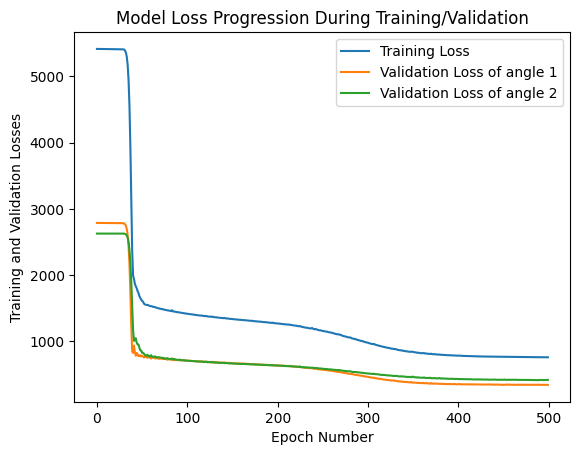

In [ ]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['y_q_layer_loss'])
plt.plot(history.history['y_t_layer_loss'])


plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss of angle 1', 'Validation Loss of angle 2'])

dict_keys(['loss', 'y_q_layer_loss', 'y_t_layer_loss', 'y_q_layer_root_mean_squared_error', 'y_t_layer_root_mean_squared_error', 'val_loss', 'val_y_q_layer_loss', 'val_y_t_layer_loss', 'val_y_q_layer_root_mean_squared_error', 'val_y_t_layer_root_mean_squared_error'])


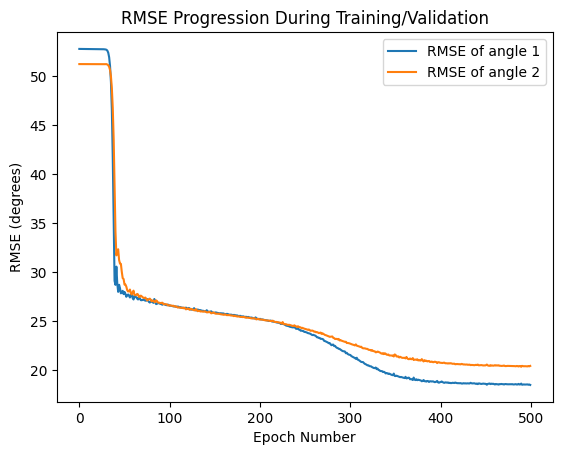

In [ ]:
print(history.history.keys())

plt.plot(history.history['y_q_layer_root_mean_squared_error'])
plt.plot(history.history['y_t_layer_root_mean_squared_error'])


plt.title('RMSE Progression During Training/Validation')
plt.ylabel('RMSE (degrees)')
plt.xlabel('Epoch Number')
plt.legend(['RMSE of angle 1', 'RMSE of angle 2'])

In [ ]:
predicitons=model.predict(test_X)

3/3 [==============================] - 0s 5ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
mae_one = mean_absolute_error(test_y[0],predicitons[0])


In [ ]:
mae_one

26.696490235524635

In [ ]:
mae_two = mean_absolute_error(test_y[1],predicitons[1])


In [ ]:
mae_two

30.019085178636526